# Mean Reversion

The next basic trading strategy after learning long-short Momentum Crossover is Mean Reversion. 
Mean reversion is the theory that asset prices and returns eventually return to their long-term average. In simple terms: "what goes up must come down, and what goes down must come up."

## Why Does Mean Reversion Work?

Mean reversion may seem irrational, but here are 4 main reasons it might work:

- Market Overreaction: News causes temporary price swings beyond fair value. 

- Profit Taking: After big moves, investors take profits, causing reversals (good profits make people sell, bringing the price back down)

- Liquidity: Temporary supply/demand imbalances get corrected (sometimes if a participant wants to sell at a price A and no buyers are available, he may be forced to sell at a price B less than A, temporarily causing the stock price to go down)

- Psychological Factors: Fear and greed drive extremes that eventually normalize (greed and fear lol)

Mean reversion works best on shorter timeframes (1-20 days) and often fails on longer timeframes where fundamental trends dominate.


## Limitations of Mean Reversion
Any approach comes with challenges and limitations. Some limitations of mean reversion include:

- Market Conditions: Mean reversion is less effective in strongly trending markets, where prices may not revert to the mean for extended periods.

- Transaction Costs: The strategy often involves frequent trading, which has a propensity of higher transaction costs.

- False Signals: Shorter time frames in particular are susceptible to market noise, which can generate false mean-reverting signals.

- Economic Events: Economic shocks or sudden news can disrupt mean-reverting patterns, leading to potential losses.

- Lack of Direction: Unlike trend-following strategies, mean reversion is non-directional, which may not suit all trading styles.

## Some key terms to understand

**Overbought**: this means that a stock has risen too much, too fast. Often, overbought stocks fall back down (mean reversion)

**Oversold**: opposite concept. A stock has gone down too much, too fast. Oversold stocks often bounce back up (again, mean reversion)

**Intraday Trading**: This means trading during the day, not trading at night. Contrarily, Interday trading means you trading 24/7.

In [71]:
#Implementing Intraday Mean reversion for AMZN stock - reusing some code from trading_MA_crossover.ipynb
#Install prereq packages
!pip install -q yfinance pandas matplotlib numpy #truncate output

In [72]:
#We will be using 1 year of AMZN data for this
import yfinance as yf
dat = yf.Ticker("AMZN")  #refer to trading_MA_crossover for data analysis incl volatility. I will be skipping EDA here since I've looked at this dataframe more than my phone.
price_data=dat.history(period="1y")
price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-19 00:00:00-04:00,177.639999,178.300003,176.160004,178.220001,31129800,0.0,0.0
2024-08-20 00:00:00-04:00,177.919998,179.009995,177.429993,178.880005,26255200,0.0,0.0
2024-08-21 00:00:00-04:00,179.919998,182.389999,178.889999,180.110001,35599100,0.0,0.0
2024-08-22 00:00:00-04:00,181.380005,181.470001,175.679993,176.130005,32047500,0.0,0.0
2024-08-23 00:00:00-04:00,177.339996,178.970001,175.240005,177.039993,29150100,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-12 00:00:00-04:00,222.229996,223.500000,219.050003,221.470001,37185800,0.0,0.0
2025-08-13 00:00:00-04:00,222.000000,224.919998,222.000000,224.559998,36508300,0.0,0.0
2025-08-14 00:00:00-04:00,227.399994,233.110001,227.020004,230.979996,61545800,0.0,0.0


## Why we use the average of High, Low and Close for our intraday trading strategy

High and Low capture the full trading range:

- High: Shows where buyers were most aggressive (maximum demand)
- Low: Shows where sellers were most aggressive (maximum supply)
- Close: Shows where the "final negotiation" ended up

### Why not include Open?

The open can be misleading:

1. Gap Effects: Opens often gap up/down due to overnight news. If Amazon opens at $120 due to overnight news, but trades $115-$125 all day, the $120 open doesn't tell us much about intraday value discovery. But the $115-$125 range shows where actual trading happened.

2. Low Volume: Opens often have lower volume and less "price discovery". First few minutes can be erratic, so the high/low/close reflect more trading activity.

3. Overnight Information: Open includes overnight news that's already "processed". Similar to point 1.

We want to measure the day's price action, not overnight gaps. So we use High, Low and Close.

The formula **(High + Low + Close)/3** is a well known indicator known as **"Typical Price"**. It's also supposed to provide smoothening of the day's activities.

# Additional Mean Reversion Strategies

Some other strategies I have used are:

1. 5 day Mean Reversion: If close is below 5 day rolling average, the stock is oversold.
2. 10 day Mean Reversion: If close is below 10 day rolling average, the stock is oversold.
3. Percentage based 5 day Mean Reversion: 5 day Mean Reversion but normalised by the 5 day previous price.
4. Calculate Volatility (standard deviation of 20 day window for close price) and divide 10 day mean reversion by this.

In [73]:
def calculate_mean_reversion_signals(df):
    """
    Calc mean reversion signals
    """
    
    data = df.copy()
    
    #Intraday Mean Reversion
    data['daily_avg'] = (data['High'] + data['Low'] + data['Close']) / 3
    data['intraday_signal'] = data['daily_avg'] - data['Close']
    
    #5-Day Mean Reversion
    data['ma_5'] = data['Close'].rolling(window=5).mean()
    data['ma5_signal'] = data['ma_5'] - data['Close'] 
    
    #10-Day Mean Reversion
    data['ma_10'] = data['Close'].rolling(window=10).mean()
    data['ma10_signal'] = data['ma_10'] - data['Close'] 
    
    """
    Question is which stock moved more significantly compared to its price level. That is why we implement percentage based Mean Reversion.  
    """
    #Percentage-based 5-Day Mean Reversion
    data['ma5_pct_signal'] = (data['ma_5'] - data['Close']) / data['ma_5']
    
    """
    High std dev: price jumps around more, high volatility. opp for low std dev.
    20 days = about a month of trading days.
    """
    #Volatility-Adjusted Mean Reversion
    data['volatility'] = data['Close'].rolling(window=20).std()
    data['vol_adj_signal'] = (data['ma_10'] - data['Close']) / data['volatility'] # How close is this move given recent volatility?
    
    return data

In [74]:
amzn_signals = calculate_mean_reversion_signals(price_data)

print("\nMean Reversion Signals (last 10 days):")
signal_cols = ['Close', 'intraday_signal', 'ma5_signal', 'ma10_signal', 'ma5_pct_signal','vol_adj_signal']
print(amzn_signals[signal_cols].tail(10))


Mean Reversion Signals (last 10 days):
                                Close  intraday_signal  ma5_signal  \
Date                                                                 
2025-08-05 00:00:00-04:00  213.750000         0.556666    7.139999   
2025-08-06 00:00:00-04:00  222.309998        -2.743332   -2.995999   
2025-08-07 00:00:00-04:00  223.130005         0.260000   -6.012006   
2025-08-08 00:00:00-04:00  222.690002         0.100001   -3.984003   
2025-08-11 00:00:00-04:00  221.300003         0.283330   -0.664001   
2025-08-12 00:00:00-04:00  221.470001        -0.130000    0.710001   
2025-08-13 00:00:00-04:00  224.559998        -0.733332   -1.929996   
2025-08-14 00:00:00-04:00  230.979996        -0.609996   -6.779996   
2025-08-15 00:00:00-04:00  231.029999         0.610001   -5.162000   
2025-08-18 00:00:00-04:00  231.490005        -0.913335   -3.584006   

                           ma10_signal  ma5_pct_signal  vol_adj_signal  
Date                                          

# Signal Direction Guide

**Positive** = Buy signal (price below average, oversold)

**Negative** = Sell signal (price above average, overbought)

## Interpreting Our Signals
1. **Intraday Signal (Daily Reversion)**

    August 6th: intraday_signal = -2.74

    *What this means:*

    Daily average was (High + Low + Close)/3

    Close was $2.74 ABOVE that daily average

    Negative signal = Sell signal (stock closed high, might pull back tomorrow)

    *Pattern:*

    Positive values = Buy signals (closed below daily average)
    Negative values = Sell signals (closed above daily average)

2. **MA5 Signal (5-Day Mean Reversion)**

    August 5th: ma5_signal = +7.14

    *What this means:*

    Close ($213.75) was $7.14 BELOW the 5-day average

    Positive signal = Buy signal (stock is oversold vs recent average)

    August 14th: ma5_signal = -6.78

    *What this means:*

    Close was $6.78 ABOVE the 5-day average

    Negative signal = Sell signal (stock is overbought)

3. **Percentage Signals (Normalized)**

    August 14th: ma5_pct_signal = -0.030241

    This is -3.02% (stock is 3% above the 5-day average)

    Much easier to interpret than raw $6.78!

    August 5th: ma5_pct_signal = +0.032324

    This is +3.23% (stock is 3.2% below the 5-day average)


In [75]:
#Note: Initially I had tested this with a buy/sell everything strategy which gave me really bad returns. Also in the real world would require a lot of transaction cost.
# Revised strategy is to keep some money in cash and some in shares and sell only when buy/sell conditions reach a certain threshold.
# Thresholds were decided after observation of trades when no limits were imposed, then checking to see if we made a profit or loss depending on the current price of the share

def smart_binary_strategy(data, initial_capital=10000):
    df = data.copy().dropna()
    
    cash = 0
    shares = initial_capital / df['Close'].iloc[0]
    portfolio_values = [initial_capital]
    trades = []
    
    for i in range(len(df)):
        date = df.index[i]
        current_price = df['Close'].iloc[i]
    
        intraday = df['intraday_signal'].iloc[i]
        ma5 = df['ma5_signal'].iloc[i]
        ma10 = df['ma10_signal'].iloc[i]
        ma5_pct = df['ma5_pct_signal'].iloc[i]
        vol_adj = df['vol_adj_signal'].iloc[i]
        
        buy_conditions = [
            intraday > 0.5,        # Intraday: modest threshold
            ma5 > 2.0,             # MA5: moderate threshold  
            ma10 > 1.0,            # MA10: lower threshold (slower signal)
            ma5_pct > 0.01,        # Percentage: 1% threshold
            vol_adj > 0.5          # Volatility: half standard deviation
        ]
        
        sell_conditions = [
            intraday < -0.5,
            ma5 < -2.0,
            ma10 < -1.0,
            ma5_pct < -0.01,
            vol_adj < -0.5
        ]
        
        if all(buy_conditions) and cash > 0:
            trades.append(f"{date.date()}: BUY at ${current_price:.2f}")
            new_shares = cash / current_price
            shares += new_shares
            cash = 0
            
        elif all(sell_conditions) and shares > 0:
            trades.append(f"{date.date()}: SELL at ${current_price:.2f}")
            cash = shares * current_price
            shares = 0
            
        portfolio_value = cash + shares * current_price
        portfolio_values.append(portfolio_value)
    
    return portfolio_values, trades

#Test thresholds
portfolio_values, trades = smart_binary_strategy(amzn_signals)
num_trades = len(trades)
final_return = ((portfolio_values[-1] - portfolio_values[0]) / portfolio_values[0]) * 100

print(f"Smart thresholds: {final_return:.1f}% return, {num_trades} trades")
print("\nTrades:")
for trade in trades[:10]:
    print(trade)

Smart thresholds: 22.0% return, 17 trades

Trades:
2024-09-20: SELL at $191.60
2024-10-07: BUY at $180.80
2024-10-29: SELL at $190.83
2024-10-31: BUY at $186.40
2024-11-05: SELL at $199.50
2024-11-18: BUY at $201.70
2024-11-26: SELL at $207.86
2024-12-18: BUY at $220.52
2025-01-06: SELL at $227.61
2025-02-07: BUY at $229.15


These trades make more sense since we are selling at higher prices than we bought (except that last trade on 7th Feb)

In [76]:
import pandas as pd

#Check cash periods so we can see what crashes we avoided
def analyze_cash_periods(trades, price_data):
    """See what returns you missed while in cash"""
    
    cash_periods = []
    in_cash = False
    cash_start_price = None
    
    for trade in trades:
        if "SELL" in trade:
            #went to cash
            in_cash = True
            cash_start_price = float(trade.split("at $")[1])
            cash_start_date = trade.split(":")[0]
            
        elif "BUY" in trade and in_cash:
            #bought back
            cash_end_price = float(trade.split("at $")[1])
            cash_end_date = trade.split(":")[0]
            missed_return = (cash_end_price - cash_start_price) / cash_start_price * 100
            cash_periods.append({
                'start_date': cash_start_date,
                'end_date': cash_end_date,
                'start_price': cash_start_price,
                'end_price': cash_end_price,
                'missed_return': missed_return
            })
            in_cash = False
    
    return cash_periods

cash_periods=analyze_cash_periods(trades, amzn_signals)
cash_periods[:5]

[{'start_date': '2024-09-20',
  'end_date': '2024-10-07',
  'start_price': 191.6,
  'end_price': 180.8,
  'missed_return': -5.636743215031307},
 {'start_date': '2024-10-29',
  'end_date': '2024-10-31',
  'start_price': 190.83,
  'end_price': 186.4,
  'missed_return': -2.321437929046799},
 {'start_date': '2024-11-05',
  'end_date': '2024-11-18',
  'start_price': 199.5,
  'end_price': 201.7,
  'missed_return': 1.1027568922305708},
 {'start_date': '2024-11-26',
  'end_date': '2024-12-18',
  'start_price': 207.86,
  'end_price': 220.52,
  'missed_return': 6.090637929375539},
 {'start_date': '2025-01-06',
  'end_date': '2025-02-07',
  'start_price': 227.61,
  'end_price': 229.15,
  'missed_return': 0.6765959316374465}]

In [77]:
def analyze_holding_periods(trades, price_data):
    
    holding_periods = []
    holding_stock = True  #Start holding stock
    buy_price = price_data['Close'].iloc[0] 
    buy_date = str(price_data.index[0].date()) 
    
    for trade in trades:
        if "SELL" in trade and holding_stock:
            # Just sold - calc gain from current holding period
            sell_price = float(trade.split("at $")[1])
            sell_date = trade.split(":")[0]
            captured_return = (sell_price - buy_price) / buy_price * 100
            holding_periods.append({
                'buy_date': buy_date,
                'sell_date': sell_date,
                'buy_price': buy_price,
                'sell_price': sell_price,
                'captured_return': captured_return
            })
            holding_stock = False
            
        elif "BUY" in trade and not holding_stock:
            # Just bought - start new holding period
            holding_stock = True
            buy_price = float(trade.split("at $")[1])
            buy_date = trade.split(":")[0]
    
    #final period if still holding
    if holding_stock:
        final_price = price_data['Close'].iloc[-1]
        final_date = str(price_data.index[-1].date())
        captured_return = (final_price - buy_price) / buy_price * 100
        holding_periods.append({
            'buy_date': buy_date,
            'sell_date': final_date,
            'buy_price': buy_price,
            'sell_price': final_price,
            'captured_return': captured_return
        })
    
    return holding_periods

holding_periods = analyze_holding_periods(trades, amzn_signals)

print("Gains you CAPTURED while holding stock:")
total_captured = 0
for period in holding_periods:
    print(f"{period['buy_date']} to {period['sell_date']}: "
          f"${period['buy_price']:.2f} → ${period['sell_price']:.2f} "
          f"({period['captured_return']:+.1f}%)")
    total_captured += period['captured_return']

print(f"\nTotal captured gains: {total_captured:.1f}%")

#Compare to losses avoided
total_avoided = sum([abs(period['missed_return']) for period in cash_periods])
print(f"Total losses avoided: {total_avoided:.1f}%")
print(f"Net benefit: {total_captured + total_avoided:.1f}%")

Gains you CAPTURED while holding stock:
2024-08-19 to 2024-09-20: $178.22 → $191.60 (+7.5%)
2024-10-07 to 2024-10-29: $180.80 → $190.83 (+5.5%)
2024-10-31 to 2024-11-05: $186.40 → $199.50 (+7.0%)
2024-11-18 to 2024-11-26: $201.70 → $207.86 (+3.1%)
2024-12-18 to 2025-01-06: $220.52 → $227.61 (+3.2%)
2025-02-07 to 2025-03-24: $229.15 → $203.26 (-11.3%)
2025-03-28 to 2025-04-09: $192.72 → $191.10 (-0.8%)
2025-06-20 to 2025-06-26: $209.69 → $217.12 (+3.5%)
2025-08-01 to 2025-08-14: $214.75 → $230.98 (+7.6%)

Total captured gains: 25.3%
Total losses avoided: 31.8%
Net benefit: 57.1%


As you can see from the below time in market calculation, we were in the market only about 44% of the time. So with that reduced market exposure we managed to capture a profit of close to 22%. This makes it a lower risk strategy.

In [78]:
#Time in Market
total_days = len(amzn_signals)
days_in_cash = 0

# Count days b/w SELL and BUY
in_cash = False
for i, row in amzn_signals.iterrows():
    
    current_date = str(i.date())
    
    for trade in trades:
        trade_date = trade.split(":")[0]
        if trade_date in current_date:
            if "SELL" in trade:
                in_cash = True
            elif "BUY" in trade:
                in_cash = False
    
    if in_cash:
        days_in_cash += 1

print(f"Total days: {total_days}")
print(f"Days in cash: {days_in_cash}")
print(f"Days in stock: {total_days - days_in_cash}")
print(f"Time in market: {(total_days - days_in_cash)/total_days*100:.1f}%")

Total days: 250
Days in cash: 140
Days in stock: 110
Time in market: 44.0%


In [79]:
# Compare returns to Buy and Hold
returns_buy_hold = ((price_data["Close"].iloc[-1] - price_data["Close"].iloc[0]) / price_data["Close"].iloc[0]) * 100

mean_rev_return = ((portfolio_values[-1] - 10000) / 10000) * 100

print(f"Buy and Hold Strategy Return: {returns_buy_hold:.2f}%")
print(f"Our Mean Reversion Strategy Return: {mean_rev_return:.2f}%")
print(f"Difference: {mean_rev_return - returns_buy_hold:.2f} percentage points")


Buy and Hold Strategy Return: 29.89%
Our Mean Reversion Strategy Return: 21.97%
Difference: -7.92 percentage points


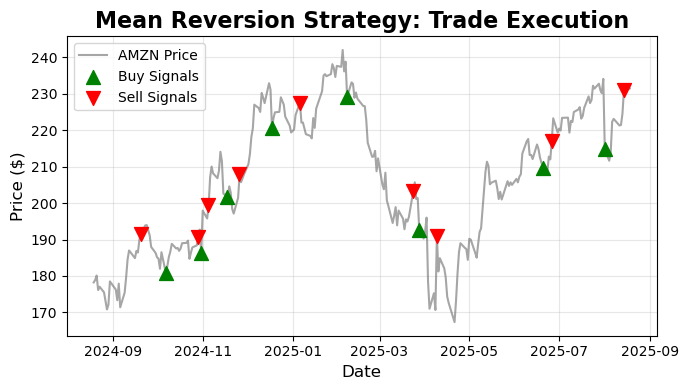

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.plot(price_data.index, price_data['Close'], alpha=0.7, color='gray', label='AMZN Price')

# Mark buy & sell points
buy_dates = []
sell_dates = []
buy_prices = []
sell_prices = []

for trade in trades:
    date_str = trade.split(':')[0]
    price = float(trade.split('$')[1])
    
    if 'BUY' in trade:
        buy_dates.append(pd.to_datetime(date_str))
        buy_prices.append(price)
    else:
        sell_dates.append(pd.to_datetime(date_str))
        sell_prices.append(price)

plt.scatter(buy_dates, buy_prices, color='green', s=100, marker='^', 
           label='Buy Signals', zorder=5)
plt.scatter(sell_dates, sell_prices, color='red', s=100, marker='v', 
           label='Sell Signals', zorder=5)

plt.title('Mean Reversion Strategy: Trade Execution', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

We bought a stock in March (indicated oversold by mean reversion) but mean reversion failed to account for the fact that there was a subsequent decline. Perhaps adding in long-short momentum crossover and executing buy/sell checks only when short MA crosses long MA might help reduce these cases.